# 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Data Load 
import pandas as pd
train_df = pd.read_csv('/content/drive/Shareddrives/2022통계학술제/data/train.csv')


test_df = pd.read_csv('/content/drive/Shareddrives/2022통계학술제/data/test.csv')



FileNotFoundError: ignored


id : 샘플 아이디

Store : 쇼핑몰 지점

Date : 주 단위(Weekly) 날짜

Temperature : 해당 쇼핑몰 주변 기온

Fuel_Price : 해당 쇼핑몰 주변 연료 가격

Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보(세일, 이벤트, 프로모션 의미를 가진 feature의 정보 값으로써 활용)

Unemployment : 해당 쇼핑몰 지역의 실업률

IsHoliday : 해당 기간의 공휴일 포함 여부

Weekly_Sales : 주간 매출액 (목표 예측값)


In [ ]:
print(train_df.head())

   id  Store        Date  Temperature  Fuel_Price  Promotion1  Promotion2  \
0   1      1  05/02/2010        42.31       2.572         NaN         NaN   
1   2      1  12/02/2010        38.51       2.548         NaN         NaN   
2   3      1  19/02/2010        39.93       2.514         NaN         NaN   
3   4      1  26/02/2010        46.63       2.561         NaN         NaN   
4   5      1  05/03/2010        46.50       2.625         NaN         NaN   

   Promotion3  Promotion4  Promotion5  Unemployment  IsHoliday  Weekly_Sales  
0         NaN         NaN         NaN         8.106      False    1643690.90  
1         NaN         NaN         NaN         8.106       True    1641957.44  
2         NaN         NaN         NaN         8.106      False    1611968.17  
3         NaN         NaN         NaN         8.106      False    1409727.59  
4         NaN         NaN         NaN         8.106      False    1554806.68  


In [ ]:
print(train_df.tail())

        id  Store        Date  Temperature  Fuel_Price  Promotion1  \
6250  6251     45  31/08/2012        75.09       3.867    23641.30   
6251  6252     45  07/09/2012        75.70       3.911    11024.45   
6252  6253     45  14/09/2012        67.87       3.948    11407.95   
6253  6254     45  21/09/2012        65.32       4.038     8452.20   
6254  6255     45  28/09/2012        64.88       3.997     4556.61   

      Promotion2  Promotion3  Promotion4  Promotion5  Unemployment  IsHoliday  \
6250        6.00       92.93     6988.31     3992.13         8.684      False   
6251       12.80       52.63     1854.77     2055.70         8.684       True   
6252         NaN        4.30     3421.72     5268.92         8.684      False   
6253       92.28       63.24     2376.38     8670.40         8.684      False   
6254       20.64        1.50     1601.01     3288.25         8.684      False   

      Weekly_Sales  
6250     734297.87  
6251     766512.66  
6252     702238.27  
6253    

In [ ]:
print('Train Data Information')
print(train_df.info())
print('---------------------------------------------------------------')
print('Train Data Missing Value')
print(train_df.isnull().sum())
print('---------------------------------------------------------------')
print('Test Data Information')
print(test_df.info())
print('---------------------------------------------------------------')
print('Test Data Missing Value')
print(test_df.isnull().sum())

In [ ]:
train_df[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.00000,1592.00000,1885.00000,1819.00000,2115.00000
mean,7155.93066,3308.12581,1462.53552,3465.95250,4518.99317
std,8408.20608,9382.82380,9667.58026,6413.11629,6048.66191
min,0.27000,-265.76000,-29.10000,0.41000,135.16000
25%,1844.29500,39.75500,4.70000,499.89500,1742.30500
50%,5221.14000,205.41000,24.60000,1532.63000,3226.41000
75%,9199.24250,1931.00500,104.01000,3640.90500,5444.03000
max,88646.76000,104519.54000,141630.61000,67474.85000,108519.28000


In [ ]:
train_df[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].median()

Promotion1   5221.14000
Promotion2    205.41000
Promotion3     24.60000
Promotion4   1532.63000
Promotion5   3226.41000
dtype: float64

# EDA

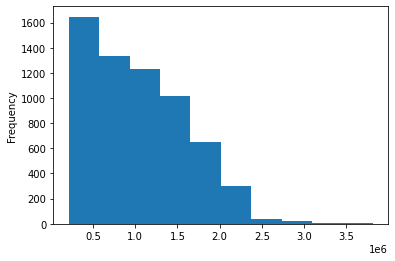

In [ ]:
import matplotlib.pyplot as plt

train_df['Weekly_Sales'].plot.hist()  #주간 매출액 (목표 예측값)

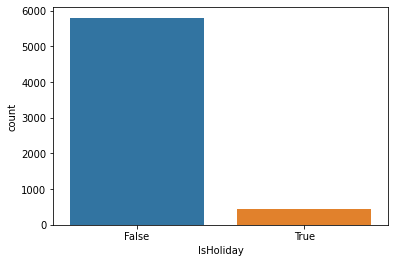

In [ ]:
import seaborn as sns
sns.countplot(x="IsHoliday",data = train_df) # 해당 기간의 공휴일 포함 여부

In [ ]:
'''
# 'Date' 정렬
train_df = train_df.sort_values('Date')
test_df = test_df.sort_values('Date')
train_df.dtypes
'''

id                int64
Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
Promotion1      float64
Promotion2      float64
Promotion3      float64
Promotion4      float64
Promotion5      float64
Unemployment    float64
IsHoliday          bool
Weekly_Sales    float64
dtype: object

In [ ]:
# 'Date' 형 변환
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%d/%m/%Y')

test_df['Date'] = pd.to_datetime(test_df['Date'], format='%d/%m/%Y')

print('Minimum date:', train_df['Date'].min())
print('Maximum date:', train_df['Date'].max())


Minimum date: 2010-02-05 00:00:00
Maximum date: 2012-09-28 00:00:00


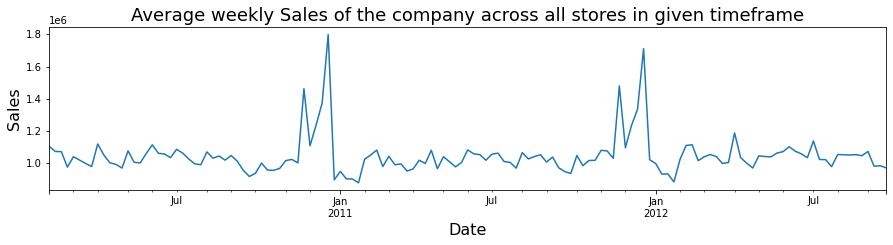

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
train_df.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Sales of the company across all stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16);

In [ ]:
# 결측치 처리 전 'Promotion' plot
import matplotlib.pyplot as plt

for i,v in enumerate(['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']):
  plt.title(v)
  plt.hist(train_df[v])
  plt.tight_layout()
  plt.show()




In [ ]:
# Promotion변수의 결측치 처리
'''
train_df['Promotion1'].fillna(train_df['Promotion1'].mean(),inplace=True)
train_df['Promotion2'].fillna(train_df['Promotion2'].mean(),inplace=True)
train_df['Promotion3'].fillna(train_df['Promotion3'].mean(),inplace=True)
train_df['Promotion4'].fillna(train_df['Promotion4'].mean(),inplace=True)
train_df['Promotion5'].fillna(train_df['Promotion5'].mean(),inplace=True)

test_df['Promotion1'].fillna(test_df['Promotion1'].mean(),inplace=True)
test_df['Promotion2'].fillna(test_df['Promotion2'].mean(),inplace=True)
test_df['Promotion3'].fillna(test_df['Promotion3'].mean(),inplace=True)
test_df['Promotion4'].fillna(test_df['Promotion4'].mean(),inplace=True)
test_df['Promotion5'].fillna(test_df['Promotion5'].mean(),inplace=True)
'''
nan = ["Promotion1", "Promotion2", "Promotion3", "Promotion4", "Promotion5"] #어차피 nan값이 promotion밖에 없으므로 이 컬럼만 리스트로 할당

for i in range(1, 46):
    print("{}의 store의 nan 갯수".format(i))
    print(train_df[train_df.Store == i][nan].isna().sum(),"\n\n")

for i in range (1, 46):
    train_df.loc[:91+(139*(i-1)), nan] = 0


In [ ]:
from scipy import interpolate
train_df = train_df.fillna(method='bfill')
test_df = test_df.fillna(method='bfill')


In [ ]:
test_df.isnull().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib import rc

train_df.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90
1,2,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44
2,3,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17
3,4,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59
4,5,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68


In [ ]:
# 결측치 처리 후 'Promotion' plot
import matplotlib.pyplot as plt
for i in ['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']:
  plt.title(i)
  plt.hist(train_df[i])
  plt.show()

In [ ]:
# Store 자료형 변환
train_df['Store'] = train_df['Store'].astype('object')
test_df['Store'] = test_df['Store'].astype('object')

In [ ]:
# 'Date'변수의 'Month'변수 생성

train_df['month'] = pd.DatetimeIndex(train_df['Date']).month
test_df['month'] = pd.DatetimeIndex(test_df['Date']).month


In [ ]:
train_df = train_df.replace({'IsHoliday' : True}, 1)
train_df = train_df.replace({'IsHoliday' : False}, 0)

test_df = test_df.replace({'IsHoliday' : True}, 1)
test_df = test_df.replace({'IsHoliday' : False}, 0)

In [ ]:
train_df.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month
4726,4727,35,2010-02-05,27.19,2.784,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,9.262,0,1230613.50,2
3475,3476,26,2010-02-05,9.55,2.788,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.488,0,1034119.21,2
2641,2642,20,2010-02-05,25.92,2.784,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.187,0,2401395.47,2
1251,1252,10,2010-02-05,54.34,2.962,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,9.765,0,2193048.75,2
5977,5978,44,2010-02-05,31.53,2.666,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.119,0,281090.95,2


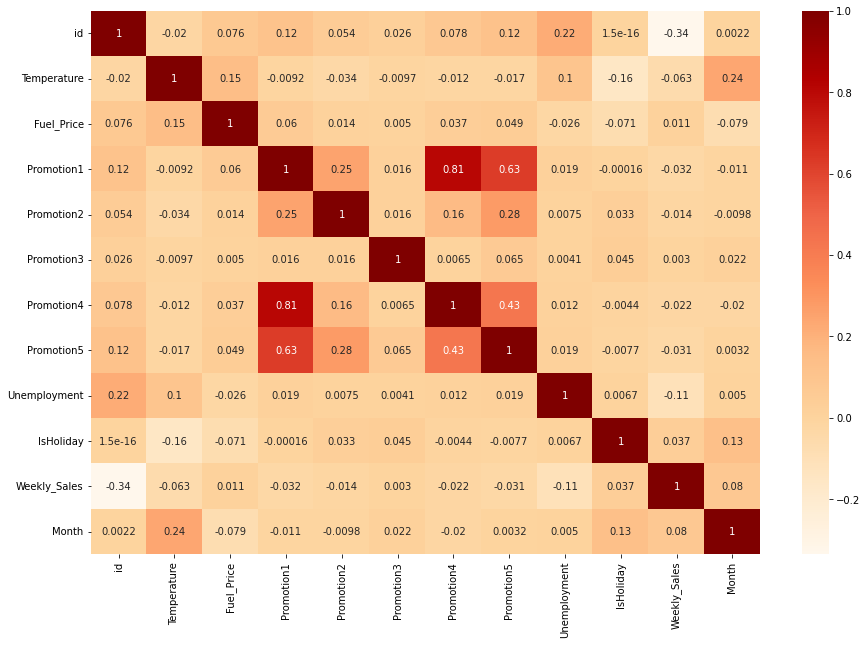

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(),annot=True,cmap='OrRd');

In [ ]:
'''
# 'Store' 라벨 인코딩(선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함 (트리 계열의 ML알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 괜찮음))
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()

train_df['Store'] = classle.fit_transform(train_df['Store'].values)
'''
# 'Store' 원핫인코딩()
import pandas as pd
train_df = pd.get_dummies(train_df, columns = ['Store'])
test_df = pd.get_dummies(test_df, columns = ['Store'])
print(train_df.head())

   id       Date  Temperature  Fuel_Price  Promotion1  Promotion2  Promotion3  \
0   1 2010-02-05        42.31       2.572         0.0         0.0         0.0   
1   2 2010-02-12        38.51       2.548         0.0         0.0         0.0   
2   3 2010-02-19        39.93       2.514         0.0         0.0         0.0   
3   4 2010-02-26        46.63       2.561         0.0         0.0         0.0   
4   5 2010-03-05        46.50       2.625         0.0         0.0         0.0   

   Promotion4  Promotion5  Unemployment  ...  Store_36  Store_37  Store_38  \
0         0.0         0.0         8.106  ...         0         0         0   
1         0.0         0.0         8.106  ...         0         0         0   
2         0.0         0.0         8.106  ...         0         0         0   
3         0.0         0.0         8.106  ...         0         0         0   
4         0.0         0.0         8.106  ...         0         0         0   

   Store_39  Store_40  Store_41  Store_42  S

##이상치 처리

In [ ]:
# 이상치 제거 하면 'Store' 12, 28,38 사라짐
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
#oulier_idx = get_outlier(df=train_df, column='Weekly_Sales', weight=1)
#train_df.drop(oulier_idx, axis=0, inplace=True)

#oulier_idx = get_outlier(df=train_df, column='Temperature', weight=1)
#train_df.drop(oulier_idx, axis=0, inplace=True)

#oulier_idx = get_outlier(df=train_df, column='Unemployment', weight=1)
#train_df.drop(oulier_idx, axis=0, inplace=True)

oulier_idx = get_outlier(df=train_df, column='Promotion1', weight=10)
train_df.drop(oulier_idx, axis=0, inplace=True)

oulier_idx = get_outlier(df=train_df, column='Promotion2', weight=10)
train_df.drop(oulier_idx, axis=0, inplace=True)
oulier_idx = get_outlier(df=train_df, column='Promotion3', weight=10)
train_df.drop(oulier_idx, axis=0, inplace=True)
oulier_idx = get_outlier(df=train_df, column='Promotion4', weight=10)
train_df.drop(oulier_idx, axis=0, inplace=True)
oulier_idx = get_outlier(df=train_df, column='Promotion5', weight=10)
train_df.drop(oulier_idx, axis=0, inplace=True)

In [ ]:
train_df.reset_index()

,index,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,month
0,0,1,1,2010-02-05,42.31,2.57,0.00,0.00,0.00,0.00,0.00,8.11,0,1643690.90,2
1,1,2,1,2010-02-12,38.51,2.55,0.00,0.00,0.00,0.00,0.00,8.11,1,1641957.44,2
2,2,3,1,2010-02-19,39.93,2.51,0.00,0.00,0.00,0.00,0.00,8.11,0,1611968.17,2
3,3,4,1,2010-02-26,46.63,2.56,0.00,0.00,0.00,0.00,0.00,8.11,0,1409727.59,2
4,4,5,1,2010-03-05,46.50,2.62,0.00,0.00,0.00,0.00,0.00,8.11,0,1554806.68,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,6203,6204,45,2011-10-07,55.82,3.58,0.00,0.00,0.00,0.00,0.00,8.52,0,753447.05,10
6204,6204,6205,45,2011-10-14,63.82,3.54,0.00,0.00,0.00,0.00,0.00,8.52,0,720946.99,10
6205,6205,6206,45,2011-10-21,59.60,3.57,0.00,0.00,0.00,0.00,0.00,8.52,0,771686.40,10
6206,6206,6207,45,2011-10-28,51.78,3.57,0.00,0.00,0.00,0.00,0.00,8.52,0,781694.57,10


In [ ]:
import pandas as pd
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
'''
def store(train, test, i):
    train = train[train.Store == i]
    test = test[test.Store == i]
    
    train = train.reset_index()
    train1 = train[train.month != 10]

    
    vali = train[train.month == 10]

    return train1, test, vali

def store2(train, test, i):
    train = train[train.Store == i]
    test = test[test.Store == i]

    train = train.reset_index()
    train1 = train[train.month != 10]
    
    vali = train[train.month == 10]

    return train1, test, vali
'''
def store(train, test, i):
    train = train[train.Store == i]
    test = test[test.Store == i]
    
    train = train.reset_index()
    train1 = train.iloc[100:]
    vali = train.iloc[88:91]

    return train1, test, vali

def store2(train, test, i):
    train = train[train.Store == i]
    test = test[test.Store == i]

    train = train.reset_index()
    train1 = train.iloc[100:]
    
    vali = train[train.month == 10]

    return train1, test, vali


def spl2(train, test, vali):
    xtrain = train[['Temperature', 'Fuel_Price', 'Unemployment', 'IsHoliday','month']]
    ytrain = train[["Weekly_Sales"]]
    xtest = test[['Temperature', 'Fuel_Price', 'Unemployment' ,'IsHoliday', 'month']]
    xvali = vali[['Temperature', 'Fuel_Price', 'Unemployment', 'IsHoliday','month']]
    yvali = vali[["Weekly_Sales"]]

    return xtrain, ytrain, xtest, xvali, yvali

def wjdrb(xtrain, xtest, xvali):
    scaler = MinMaxScaler()
    xtrain = pd.DataFrame(scaler.fit_transform(xtrain))
    xtest = pd.DataFrame(scaler.fit_transform(xtest))
    xvali = pd.DataFrame(scaler.fit_transform(xvali))
    return xtrain, xtest, xvali


def wjdrb2(xtrain, xtest, xvali):
    scaler = MinMaxScaler()
    xtrain = pd.DataFrame(scaler.fit_transform(xtrain))
    xtest = pd.DataFrame(scaler.fit_transform(xtest))
    xvali = pd.DataFrame(scaler.fit_transform(xvali))
    
    return xtrain, xtest, xvali

def model2(xtrain, ytrain, xtest):
    model = RandomForestRegressor()
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    
    return pred

def model(xtrain, ytrain, xtest, xvali, yvali):
    eval_set = [(xvali, yvali)]
    xgb_model = xgb.XGBRegressor(n_estimators=400, learning_rate=0.07, subsample=0.7,
                           colsample_bytree=0.7, max_depth=5, silent = 1, nthread = 4, min_child_weight = 4)
    
    xgb_model.fit(xtrain,ytrain, eval_set=eval_set, eval_metric="rmse", early_stopping_rounds=15)
    pred = xgb_model.predict(xtest)
    
    return pred

def spl(train, test, vali):
    xtrain = train[['Temperature', 'Fuel_Price','Promotion3', 'month']]
    ytrain = train[["Weekly_Sales"]]
    xvali = vali[['Temperature', 'Fuel_Price','Promotion3', 'month']]
    yvali = vali[["Weekly_Sales"]]
    xtest = test[['Temperature', 'Fuel_Price', 'Promotion3', 'month']]
    
    return xtrain, ytrain, xtest, xvali, yvali




In [ ]:
i=42
train1, test1, vali = store2(train_df, test_df, i)
xtrain, ytrain, xtest, xvali, yvali = spl2(train1, test1, vali)
#train, xtest, xvali = wjdrb2(xtrain, xtest, xvali)
predict = model2(xtrain, ytrain, xtest)

for i in predict:
  result.append(i)

In [ ]:
i=43
train1, test1, vali = store2(train_df, test_df, i)
xtrain, ytrain, xtest, xvali, yvali = spl2(train1, test1, vali)
#xtrain, xtest, xvali = wjdrb2(xtrain, xtest, xvali)
predict = model2(xtrain, ytrain, xtest)

for i in predict:
  result.append(i)

In [ ]:
i=44
train1, test1, vali = store2(train_df, test_df, i)
xtrain, ytrain, xtest, xvali, yvali = spl2(train1, test1, vali)
#xtrain, xtest, xvali = wjdrb2(xtrain, xtest, xvali)
predict = model2(xtrain, ytrain, xtest)

for i in predict:
  result.append(i)

In [ ]:
def store(train, test, i):
    train = train[train.Store == i]
    test = test[test.Store == i]
    
    train = train.reset_index()
    train1 = train[train.month != 10]

    
    vali = train[train.month == 10]

    return train1, test, vali

i=45
train1, test1, vali = store(train_df, test_df, i)
xtrain, ytrain, xtest, xvali, yvali = spl(train1, test1, vali)
#xtrain, xtest, xvali = wjdrb(xtrain, xtest, xvali)
predict = model(xtrain, ytrain, xtest, xvali, yvali)
for i in predict:
  result.append(i)




[0]	validation_0-rmse:685228
Will train until validation_0-rmse hasn't improved in 15 rounds.
[1]	validation_0-rmse:634691
[2]	validation_0-rmse:588702
[3]	validation_0-rmse:544155
[4]	validation_0-rmse:504648
[5]	validation_0-rmse:466695
[6]	validation_0-rmse:433430
[7]	validation_0-rmse:400640
[8]	validation_0-rmse:370016
[9]	validation_0-rmse:342765
[10]	validation_0-rmse:303378
[11]	validation_0-rmse:266692
[12]	validation_0-rmse:243632
[13]	validation_0-rmse:221827
[14]	validation_0-rmse:203044
[15]	validation_0-rmse:178004
[16]	validation_0-rmse:161333
[17]	validation_0-rmse:132951
[18]	validation_0-rmse:119309
[19]	validation_0-rmse:95966.3
[20]	validation_0-rmse:84579.9
[21]	validation_0-rmse:73800.6
[22]	validation_0-rmse:63967.3
[23]	validation_0-rmse:48347.3
[24]	validation_0-rmse:42237
[25]	validation_0-rmse:36324.1
[26]	validation_0-rmse:31843.5
[27]	validation_0-rmse:28338.4
[28]	validation_0-rmse:26122.8
[29]	validation_0-rmse:25557.8
[30]	validation_0-rmse:25645.3
[31]	

In [ ]:
train_df[train_df['Store']==45]

In [ ]:
for i in range(1,46):
  print(i)
  print(train_df[train_df['Store']==i].shape)
  print()

In [ ]:
print(len(result))

180


In [ ]:
# 42부터 에러
if __name__ == '__main__':
    
    result = []
    exc = [36, 38 , 42, 43, 44]    ## 비선형적인 지점들의 대한 리스트
    for i in range(1, 46):
      if i<42:   
          if i in exc:
              print(i)
              train1, test1, vali = store2(train_df, test_df, i)
              xtrain, ytrain, xtest, xvali, yvali = spl2(train1, test1, vali)
            # xtrain, xtest, xvali = wjdrb2(xtrain, xtest, xvali)
              predict = model2(xtrain, ytrain, xtest)

          else:
              print(i)
              train1, test1, vali = store(train_df, test_df, i)
              xtrain, ytrain, xtest, xvali, yvali = spl(train1, test1, vali)
              #xtrain, xtest, xvali = wjdrb(xtrain, xtest, xvali)
              predict = model(xtrain, ytrain, xtest, xvali, yvali)

          for i in predict:
              result.append(i)
      else:
        pass

1
[0]	validation_0-rmse:1.36368e+06
Will train until validation_0-rmse hasn't improved in 15 rounds.
[1]	validation_0-rmse:1.2635e+06
[2]	validation_0-rmse:1.17031e+06
[3]	validation_0-rmse:1.08348e+06
[4]	validation_0-rmse:1.00261e+06
[5]	validation_0-rmse:928047
[6]	validation_0-rmse:857188
[7]	validation_0-rmse:792514
[8]	validation_0-rmse:731128
[9]	validation_0-rmse:674435
[10]	validation_0-rmse:621783
[11]	validation_0-rmse:572773
[12]	validation_0-rmse:527333
[13]	validation_0-rmse:485246
[14]	validation_0-rmse:445879
[15]	validation_0-rmse:396145
[16]	validation_0-rmse:351289
[17]	validation_0-rmse:320658
[18]	validation_0-rmse:292605
[19]	validation_0-rmse:265367
[20]	validation_0-rmse:241986
[21]	validation_0-rmse:204188
[22]	validation_0-rmse:183753
[23]	validation_0-rmse:159053
[24]	validation_0-rmse:140223
[25]	validation_0-rmse:118240
[26]	validation_0-rmse:99069.7
[27]	validation_0-rmse:84819
[28]	validation_0-rmse:77716
[29]	validation_0-rmse:73742.3
[30]	validation_0-r

In [ ]:
col = ['Weekly_Sales']
df_result = pd.DataFrame(result, columns = col)
pd.options.display.float_format = '{:.2f}'.format
df_result


,Weekly_Sales
0,1485636.00
1,1492472.62
2,1485636.00
3,1485636.00
4,1786935.00
...,...
175,314330.78
176,745207.19
177,745207.19
178,745207.19


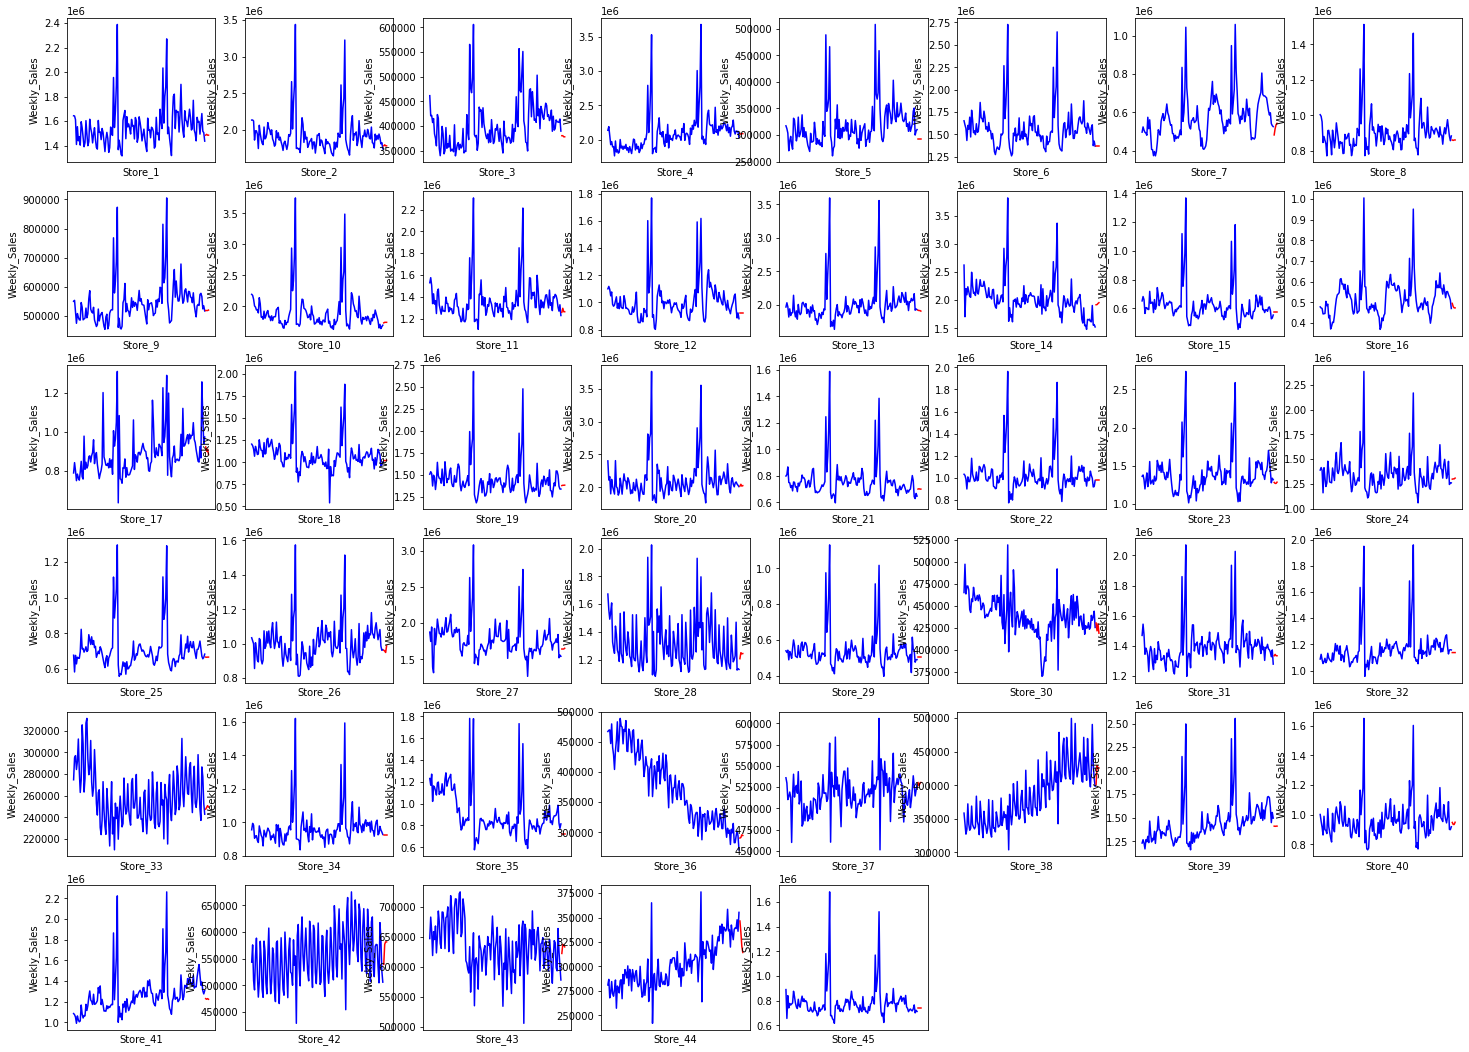

In [ ]:
# 추세 시각화

import pandas as pd
from matplotlib import dates

#Visualizing
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn.palettes import color_palette

train = pd.read_csv('/content/drive/Shareddrives/2022통계학술제/data/train.csv')
data = pd.read_csv('/content/drive/Shareddrives/2022통계학술제/data/test.csv')
data = pd.concat([data, df_result],axis=1)
fig = plt.figure(figsize=(25,25)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
exc = [36, 38 , 42, 43, 44]
#for i in exc:
for i in range(1,46):
    train2 = train[train.Store == i]
    data2 = data[data.Store == i]

    train2  = train2[["Date", "Weekly_Sales"]]
    test2 = data2[["Date", "Weekly_Sales"]]

    train2= train2.reset_index()
    #train2 = train2.iloc[100:]
    test2 = test2.reset_index()

    ax = fig.add_subplot(8,8,i) ## 그림 뼈대(프레임) 생성

    plt.xlabel("Store_{}".format(i)) 
    plt.ylabel('Weekly_Sales')
    plt.xticks(rotation=15)
    ax.xaxis.set_major_locator(dates.MonthLocator(interval = 3))
    

    ax.plot(train2['Date'] ,train2["Weekly_Sales"],marker='',label='train', color="blue")
    ax.plot(test2['Date'], test2["Weekly_Sales"], label=test2, color="red") 
plt.show()


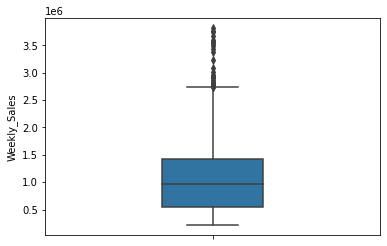

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=train_df,y="Weekly_Sales", width=0.3, color='tab:blue')
plt.show()




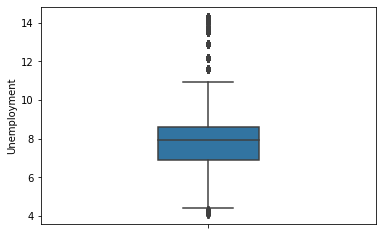

In [ ]:
import seaborn as sns
sns.boxplot(data=train_df,y="Unemployment", width=0.3, color='tab:blue')
plt.show()

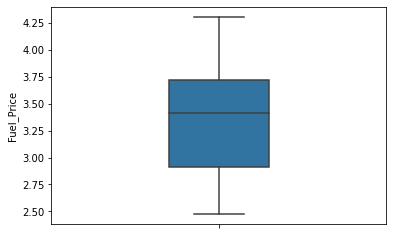

In [ ]:
import seaborn as sns
sns.boxplot(data=train_df,y="Fuel_Price", width=0.3, color='tab:blue')
plt.show()

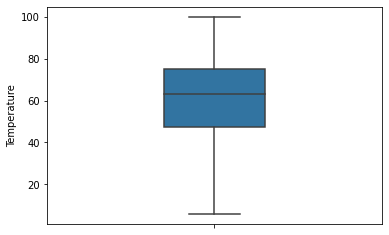

In [ ]:
import seaborn as sns
sns.boxplot(data=train_df,y="Temperature", width=0.3, color='tab:blue')
plt.show()

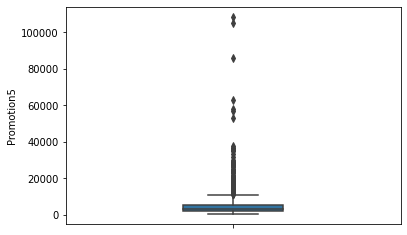

In [ ]:
import seaborn as sns
sns.boxplot(data=train_df,y="Promotion5", width=0.3, color='tab:blue')
plt.show()

#print(train_df[train_df['Promotion1']>=21000].count())

In [ ]:
train_df.info()

In [ ]:
#train_df['Month_NON'] = train_df['Month']

train_df['Month_NON'] = train_df['Month']
train_df['Month_11'] = train_df['Month']
train_df['Month_12'] = train_df['Month']


train_df.loc[(train_df.Month_NON <= 10 ),'Month_NON']=1
train_df.loc[(train_df.Month_NON == 11 ),'Month_NON']=0
train_df.loc[(train_df.Month_NON == 12 ),'Month_NON']=0


train_df.loc[(train_df.Month_11 <= 10 ),'Month_11']=0
train_df.loc[(train_df.Month_11 == 11 ),'Month_11']=1
train_df.loc[(train_df.Month_11 == 12 ),'Month_11']=0

train_df.loc[(train_df.Month_12 <= 10 ),'Month_12']=0
train_df.loc[(train_df.Month_12 == 11 ),'Month_12']=0
train_df.loc[(train_df.Month_12 == 12 ),'Month_12']=1



test_df['Month_NON'] = test_df['Month']
test_df['Month_11'] = test_df['Month']
test_df['Month_12'] = test_df['Month']


test_df.loc[(test_df.Month_NON <= 10 ),'Month_NON']=1
test_df.loc[(test_df.Month_NON == 11 ),'Month_NON']=0
test_df.loc[(test_df.Month_NON == 12 ),'Month_NON']=0


test_df.loc[(test_df.Month_11 <= 10 ),'Month_11']=0
test_df.loc[(test_df.Month_11 == 11 ),'Month_11']=1
test_df.loc[(test_df.Month_11 == 12 ),'Month_11']=0

test_df.loc[(test_df.Month_12 <= 10 ),'Month_12']=0
test_df.loc[(test_df.Month_12 == 11 ),'Month_12']=0
test_df.loc[(test_df.Month_12 == 12 ),'Month_12']=1



In [ ]:
#train_df.groupby('Store')['Weekly_Sales'].mean()
train_df.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Month_NON,Month_11,Month_12
0,1,1,2010-02-05,42.31,2.572,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.106,0,1643690.90,2,1,0,0
1,2,1,2010-02-12,38.51,2.548,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.106,1,1641957.44,2,1,0,0
2,3,1,2010-02-19,39.93,2.514,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.106,0,1611968.17,2,1,0,0
3,4,1,2010-02-26,46.63,2.561,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.106,0,1409727.59,2,1,0,0
4,5,1,2010-03-05,46.50,2.625,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.106,0,1554806.68,3,1,0,0


# 모델링

In [ ]:
X_train = train_df.drop(columns=['Weekly_Sales','id','Date','Month'])
y_train = train_df['Weekly_Sales']


In [ ]:
X_test= test_df.drop(columns=['id','Date','Month'])

Store 몇개가 사라져있음
왜? -> 이상치 제거하면서 사라짐

In [ ]:
X_train.info()

In [ ]:
X_test.info()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  test_size=0.2, random_state=1105)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(4966, 57)
(1242, 57)
(4966,)
(1242,)


In [ ]:
'''
# 정규화 ??
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_val_std = std.transform(X_val)
'''

# 표준화
from sklearn.preprocessing import MinMaxScaler
def wjdrb(xtrain, xtest, xvali):
    scaler = MinMaxScaler()
    xtrain = pd.DataFrame(scaler.fit_transform(xtrain))
    xtest = pd.DataFrame(scaler.fit_transform(xtest))
    xvali = pd.DataFrame(scaler.fit_transform(xvali))
    return xtrain, xtest, xvali
    
X_train_std, X_test_std, X_val_std=wjdrb(X_train, X_test, X_val)

## 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#X_test = test_df
mlr = LinearRegression()
mlr.fit(X_train_std, y_train) 
y_predict = mlr.predict(X_val_std)


# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(y_predict[:10])
print('______________')
print(y_val[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[1375143.96692498 1082151.96692498 1357671.96692498  707239.96692498
 1380519.96692498  923335.96692498  969095.96692498  538087.96692498
 1331943.96692498 1378151.96692498]
______________
3139    1637266.29
3568     946091.79
1414    1244390.03
2831     649878.29
3889    1124660.77
4851     892133.41
4588     994610.99
1235     564606.10
3276    1402818.01
3169    1288154.10
Name: Weekly_Sales, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_val, y_predict)**0.5
print(RMSE)

# 이상치 제거 안하고 표준화도 안했을 시 529
# 이상치 제거하고 표준화를 했을 시 514
# 이상치 제거하고 Store 원핫인코딩하고 표준화 했을 시 124
# 이상치 제거안하고 Store 원핫인코딩하고 표준화 했을 시 144

144170.18196288045


In [ ]:
y_predict = mlr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

data_dim=xgb.DMatrix(data=X_train, label=y_train)

xg_reg=xgb.XGBRegressor(objective='reg:squarederror',booster='gbtree',colsample_bytree=1, 
                        learning_rate=0.04,max_depth=30, alpha=10, n_estimators=200)
xg_reg.fit(X_train, y_train)
pred_train=xg_reg.predict(X_train)
pred_test=xg_reg.predict(X_val)

# pred_test = np.where(pred_test>(y_val.mean()),pred_test*1.02,pred_test)


# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(pred_test[:10])
print('______________')
print(y_val[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[1921999.   1000106.25 1470724.4  1602331.2   261330.45  540858.4
  884477.44 1461844.4  1536124.   1006624.75]
______________
1872    2095599.93
1598     970328.68
3864    1216059.41
824     1513229.16
4567     276899.95
1176     532226.20
1615     866401.45
744     1306194.55
3177    1332952.47
4652     965853.58
Name: Weekly_Sales, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_val, pred_test)**0.5
print(RMSE)

# 이상치 제거 안하고 표준화도 안했을 시 135
# 이상치 제거하고 표준화를 했을 시 123
# 이상치 제거하고 Store 원핫인코딩하고 표준화 했을 시 114
# 이상치 제거안하고 Store 원핫인코딩하고 표준화 했을 시 121

149319.43262899964


In [ ]:
y_predict = xg_reg.predict(X_test) # 이상치 제거안하고 Store 원핫인코딩하고 표준화 했을 시 실행 안됨

ValueError: ignored

## catboost

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor
# l2_leaf_reg=0.01, iterations=10, depth=2
cat_reg = CatBoostRegressor(depth=8, iterations=5000)
cat_reg.fit(X_train_std, y_train)

pred_test=cat_reg.predict(X_val_std)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
0:	learn: 557502.4048305	total: 54ms	remaining: 4m 30s
1:	learn: 553586.1541065	total: 82.1ms	remaining: 3m 25s
2:	learn: 549837.6335133	total: 85.9ms	remaining: 2m 23s
3:	learn: 546434.8255435	total: 102ms	remaining: 2m 7s
4:	learn: 542742.8969144	total: 137ms	remaining: 2m 17s
5:	learn: 539663.3162049	total: 158ms	remaining: 2m 11s
6:	learn: 536351.8201848	total: 176ms	remaining: 2m 5s
7:	learn: 533006.7669617	total: 193ms	remaining: 2m
8:	learn: 529640.9843011	total: 204ms	remaining: 1m 53s
9:	learn: 526575.0607655	total: 236ms	remaining: 1m 57s
10:	learn: 523689.3623062	total: 255ms	remaining: 1m 55s
11:	learn: 520250.3309171	total: 280ms	remaining: 1m 56s
12:	learn: 517015.7312418	total: 289ms	remaining: 1m 50s
13:	learn: 513816.7506780	total: 305ms	remaining: 1m 48s
14:	learn: 510740.6345245	total: 322ms	remaining: 1m 47s
15:	learn: 507490.5867464	total: 339ms	remaining: 1m 45s
16:	learn: 504426.8764981	total: 349ms	remaining: 1m 42s
17:	learn:

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_val, pred_test)**0.5
print(RMSE)

# 이상치 제거 안하고 표준화도 안했을 시 102
# 이상치 제거하고 표준화를 했을 시 98
# 이상치 제거하고 Store 원핫인코딩하고 표준화 했을 시 99
# 이상치 제거안하고 Store 원핫인코딩하고 표준화 했을 시 102
# Store 원핫인코딩 하고 이상치제거하고 표준화 했을 시 97(8, 2000)
# Store 원핫인코딩 하고 이상치제거하고 표준화 했을 시 100(4, 50000)
# Store 원핫인코딩 하고 이상치제거하고  했을 시 97(8, 2000)

144710.69314278595


In [ ]:
y_predict = cat_reg.predict(X_test)

# 제출

In [ ]:
sample_submission = pd.read_csv('/content/drive/Shareddrives/2022통계학술제/data/sample_submission.csv')

In [ ]:
# 예측된 값을 정답파일과 병합
sample_submission['Weekly_Sales'] = df_result['Weekly_Sales']

# 정답파일 데이터프레임 확인
sample_submission

,id,Weekly_Sales
0,1,1485636.00
1,2,1492472.62
2,3,1485636.00
3,4,1485636.00
4,5,1786935.00
...,...,...
175,176,314330.78
176,177,745207.19
177,178,745207.19
178,179,745207.19


In [ ]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv('submission_good_model3.csv',index = False)